In [19]:
from ansys.mapdl.core import launch_mapdl
from ansys.mapdl.core.convert import convert_apdl_block
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Linear model

In [46]:
def lvv_population(soil_k_vector):
    
    mapdl = launch_mapdl(loglevel="WARNING", print_com=True)

    mapdl.clear()
    mapdl.prep7()


    ### Modelling
    mapdl.mptemp()
    mapdl.mptemp(1, 0)
    # tube material
    # Young's Mod
    mapdl.mpdata("EX", 1, "", 140000000000)
    # Poissons Ratio
    mapdl.mpdata("PRXY", 1, "", 0.34)
    # density
    mapdl.mpdata("DENS", 1, "", 8500)
    # material damping - note there is an alternative way to do this (Rayleigh damping), which is frequency dependent
    mapdl.mpdata("DMPR", 1, "", 0.01)
    # top mass
    # Young's Mod
    mapdl.mpdata("EX", 2, "", 210000000000)
    # Poissons Ratio
    mapdl.mpdata("PRXY", 2, "", 0.3)
    # density
    # 3.52kg = 41498
    mapdl.mpdata("DENS", 2, "", 8045)
    # material damping - note there is an alternative way to do this (Rayleigh damping), which is frequency dependent
    mapdl.mpdata("DMPR", 2, "", 0.01)
    # Create element types
    mapdl.et(1, "BEAM188")
    mapdl.et(2, "COMBIN14", 0, 0, 0)
    # ET,3,COMBIN39,0,1,0,1,0
    # create keypoints for geometry
    mapdl.k(1, 0, 0, 0)
    mapdl.k(2, 0.3, 0, 0)
    mapdl.k(3, 1.5, 0, 0)
    mapdl.k(4, 1.5785, 0, 0)
    # orientation keypoint
    mapdl.k(5, 0, 0.5, 0)
    # connect the keypoints with lines
    mapdl.lstr(1, 2)
    mapdl.lstr(2, 3)
    mapdl.lstr(3, 4)
    # create cross-sections
    mapdl.sectype(1, "BEAM", "CTUBE", "monopile", 0)
    mapdl.secoffset("CENT")
    mapdl.secdata(0.0068, 0.0075, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    # top mass
    mapdl.sectype(2, "BEAM", "CSOLID", "topmass", 0)
    mapdl.secoffset("CENT")
    mapdl.secdata(0.0254, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    # Meshing monopile
    # embedded length
    mapdl.mat(1)
    mapdl.lsel("", "", "", 1)
    mapdl.run("LATT,1,1,1, ,       5, ,1 ")  # sets KP orientation and cross section
    # Set number of nodes for line
    mapdl.lesize("ALL", "", "", 60, "", "", "", "", 1)
    # *
    # Mesh it
    mapdl.lmesh(1)
    # Meshing monopile
    # embedded length
    mapdl.mat(1)
    mapdl.lsel("", "", "", 2)
    mapdl.run("LATT,1,1,1, ,       5, ,1 ")  # sets KP orientation and cross section
    # Set number of nodes for line
    mapdl.lesize("ALL", "", "", 10, "", "", "", "", 1)
    # *
    # Mesh it
    mapdl.lmesh(2)
    # top mass
    mapdl.mat(1)
    mapdl.lsel("", "", "", 3)
    mapdl.run("LATT,1,1,1, ,       5, ,2 ")  # sets KP orientation and cross section
    # Set number of nodes for line
    mapdl.lesize("ALL", "", "", 1, "", "", "", "", 1)
    # *
    # Mesh it
    mapdl.lmesh(3)
    # Workaround for selecting different material types post meshing
    mapdl.esel("", "", "", 71, 71)
    mapdl.mpchg(2, "ALL")
    mapdl.esel("ALL")
    # Turn on 3D plotting
    # mapdl.shrink(0)
    # mapdl.eshape(1.0)
    # mapdl.efacet(1)
    # mapdl.ratio(1, 1, 1)
    # mapdl.cformat(32, 0)
    # mapdl.replot()
 
    # nodes for spring ends
    # y-direction
    mapdl.n(200, 0, 0.1, 0)
    mapdl.n(201, 0.005, 0.1, 0)
    mapdl.n(202, 0.01, 0.1, 0)
    mapdl.n(203, 0.015, 0.1, 0)
    mapdl.n(204, 0.02, 0.1, 0)
    mapdl.n(205, 0.025, 0.1, 0)
    mapdl.n(206, 0.03, 0.1, 0)
    mapdl.n(207, 0.035, 0.1, 0)
    mapdl.n(208, 0.04, 0.1, 0)
    mapdl.n(209, 0.045, 0.1, 0)
    mapdl.n(210, 0.05, 0.1, 0)
    mapdl.n(211, 0.055, 0.1, 0)
    mapdl.n(212, 0.06, 0.1, 0)
    mapdl.n(213, 0.065, 0.1, 0)
    mapdl.n(214, 0.07, 0.1, 0)
    mapdl.n(215, 0.075, 0.1, 0)
    mapdl.n(216, 0.08, 0.1, 0)
    mapdl.n(217, 0.085, 0.1, 0)
    mapdl.n(218, 0.09, 0.1, 0)
    mapdl.n(219, 0.095, 0.1, 0)
    mapdl.n(220, 0.1, 0.1, 0)
    mapdl.n(221, 0.105, 0.1, 0)
    mapdl.n(222, 0.11, 0.1, 0)
    mapdl.n(223, 0.115, 0.1, 0)
    mapdl.n(224, 0.12, 0.1, 0)
    mapdl.n(225, 0.125, 0.1, 0)
    mapdl.n(226, 0.13, 0.1, 0)
    mapdl.n(227, 0.135, 0.1, 0)
    mapdl.n(228, 0.14, 0.1, 0)
    mapdl.n(229, 0.145, 0.1, 0)
    mapdl.n(230, 0.15, 0.1, 0)
    mapdl.n(231, 0.155, 0.1, 0)
    mapdl.n(232, 0.16, 0.1, 0)
    mapdl.n(233, 0.165, 0.1, 0)
    mapdl.n(234, 0.17, 0.1, 0)
    mapdl.n(235, 0.175, 0.1, 0)
    mapdl.n(236, 0.18, 0.1, 0)
    mapdl.n(237, 0.185, 0.1, 0)
    mapdl.n(238, 0.19, 0.1, 0)
    mapdl.n(239, 0.195, 0.1, 0)
    mapdl.n(240, 0.2, 0.1, 0)
    mapdl.n(241, 0.205, 0.1, 0)
    mapdl.n(242, 0.21, 0.1, 0)
    mapdl.n(243, 0.215, 0.1, 0)
    mapdl.n(244, 0.22, 0.1, 0)
    mapdl.n(245, 0.225, 0.1, 0)
    mapdl.n(246, 0.23, 0.1, 0)
    mapdl.n(247, 0.235, 0.1, 0)
    mapdl.n(248, 0.24, 0.1, 0)
    mapdl.n(249, 0.245, 0.1, 0)
    mapdl.n(250, 0.25, 0.1, 0)
    mapdl.n(251, 0.255, 0.1, 0)
    mapdl.n(252, 0.26, 0.1, 0)
    mapdl.n(253, 0.265, 0.1, 0)
    mapdl.n(254, 0.27, 0.1, 0)
    mapdl.n(255, 0.275, 0.1, 0)
    mapdl.n(256, 0.28, 0.1, 0)
    mapdl.n(257, 0.285, 0.1, 0)
    mapdl.n(258, 0.29, 0.1, 0)
    mapdl.n(259, 0.295, 0.1, 0)
    mapdl.n(260, 0.3, 0.1, 0)
    # z-direction
    mapdl.n(261, 0, 0, 0.1)
    mapdl.n(262, 0.005, 0, 0.1)
    mapdl.n(263, 0.01, 0, 0.1)
    mapdl.n(264, 0.015, 0, 0.1)
    mapdl.n(265, 0.02, 0, 0.1)
    mapdl.n(266, 0.025, 0, 0.1)
    mapdl.n(267, 0.03, 0, 0.1)
    mapdl.n(268, 0.035, 0, 0.1)
    mapdl.n(269, 0.04, 0, 0.1)
    mapdl.n(270, 0.045, 0, 0.1)
    mapdl.n(271, 0.05, 0, 0.1)
    mapdl.n(272, 0.055, 0, 0.1)
    mapdl.n(273, 0.06, 0, 0.1)
    mapdl.n(274, 0.065, 0, 0.1)
    mapdl.n(275, 0.07, 0, 0.1)
    mapdl.n(276, 0.075, 0, 0.1)
    mapdl.n(277, 0.08, 0, 0.1)
    mapdl.n(278, 0.085, 0, 0.1)
    mapdl.n(279, 0.09, 0, 0.1)
    mapdl.n(280, 0.095, 0, 0.1)
    mapdl.n(281, 0.1, 0, 0.1)
    mapdl.n(282, 0.105, 0, 0.1)
    mapdl.n(283, 0.11, 0, 0.1)
    mapdl.n(284, 0.115, 0, 0.1)
    mapdl.n(285, 0.12, 0, 0.1)
    mapdl.n(286, 0.125, 0, 0.1)
    mapdl.n(287, 0.13, 0, 0.1)
    mapdl.n(288, 0.135, 0, 0.1)
    mapdl.n(289, 0.14, 0, 0.1)
    mapdl.n(290, 0.145, 0, 0.1)
    mapdl.n(291, 0.15, 0, 0.1)
    mapdl.n(292, 0.155, 0, 0.1)
    mapdl.n(293, 0.16, 0, 0.1)
    mapdl.n(294, 0.165, 0, 0.1)
    mapdl.n(295, 0.17, 0, 0.1)
    mapdl.n(296, 0.175, 0, 0.1)
    mapdl.n(297, 0.18, 0, 0.1)
    mapdl.n(298, 0.185, 0, 0.1)
    mapdl.n(299, 0.19, 0, 0.1)
    mapdl.n(300, 0.195, 0, 0.1)
    mapdl.n(301, 0.2, 0, 0.1)
    mapdl.n(302, 0.205, 0, 0.1)
    mapdl.n(303, 0.21, 0, 0.1)
    mapdl.n(304, 0.215, 0, 0.1)
    mapdl.n(305, 0.22, 0, 0.1)
    mapdl.n(306, 0.225, 0, 0.1)
    mapdl.n(307, 0.23, 0, 0.1)
    mapdl.n(308, 0.235, 0, 0.1)
    mapdl.n(309, 0.24, 0, 0.1)
    mapdl.n(310, 0.245, 0, 0.1)
    mapdl.n(311, 0.25, 0, 0.1)
    mapdl.n(312, 0.255, 0, 0.1)
    mapdl.n(313, 0.26, 0, 0.1)
    mapdl.n(314, 0.265, 0, 0.1)
    mapdl.n(315, 0.27, 0, 0.1)
    mapdl.n(316, 0.275, 0, 0.1)
    mapdl.n(317, 0.28, 0, 0.1)
    mapdl.n(318, 0.285, 0, 0.1)
    mapdl.n(319, 0.29, 0, 0.1)
    mapdl.n(320, 0.295, 0, 0.1)
    mapdl.n(321, 0.3, 0, 0.1)
    # Change to correct element type
    mapdl.type(2)
    # create spring elements
    # y-direction
    #mapdl.run("REAL, 1")
    mapdl.real(1)
    # e,1,200
    mapdl.e(3, 201)
    mapdl.e(4, 202)
    mapdl.e(5, 203)
    mapdl.e(6, 204)
    mapdl.e(7, 205)
    mapdl.e(8, 206)
    mapdl.e(9, 207)
    mapdl.e(10, 208)
    mapdl.e(11, 209)
    mapdl.e(12, 210)
    mapdl.e(13, 211)
    mapdl.e(14, 212)
    mapdl.e(15, 213)
    mapdl.e(16, 214)
    mapdl.e(17, 215)
    mapdl.e(18, 216)
    mapdl.e(19, 217)
    mapdl.e(20, 218)
    mapdl.e(21, 219)
    mapdl.e(22, 220)
    mapdl.e(23, 221)
    mapdl.e(24, 222)
    mapdl.e(25, 223)
    mapdl.e(26, 224)
    mapdl.e(27, 225)
    mapdl.e(28, 226)
    mapdl.e(29, 227)
    mapdl.e(30, 228)
    mapdl.e(31, 229)
    mapdl.e(32, 230)
    mapdl.e(33, 231)
    mapdl.e(34, 232)
    mapdl.e(35, 233)
    mapdl.e(36, 234)
    mapdl.e(37, 235)
    mapdl.e(38, 236)
    mapdl.e(39, 237)
    mapdl.e(40, 238)
    mapdl.e(41, 239)
    mapdl.e(42, 240)
    mapdl.e(43, 241)
    mapdl.e(44, 242)
    mapdl.e(45, 243)
    mapdl.e(46, 244)
    mapdl.e(47, 245)
    mapdl.e(48, 246)
    mapdl.e(49, 247)
    mapdl.e(50, 248)
    mapdl.e(51, 249)
    mapdl.e(52, 250)
    mapdl.e(53, 251)
    mapdl.e(54, 252)
    mapdl.e(55, 253)
    mapdl.e(56, 254)
    mapdl.e(57, 255)
    mapdl.e(58, 256)
    mapdl.e(59, 257)
    mapdl.e(60, 258)
    mapdl.e(61, 259)
    mapdl.e(2, 260)
    # z-direction
    # e,1,261
    mapdl.e(3, 262)
    mapdl.e(4, 263)
    mapdl.e(5, 264)
    mapdl.e(6, 265)
    mapdl.e(7, 266)
    mapdl.e(8, 267)
    mapdl.e(9, 268)
    mapdl.e(10, 269)
    mapdl.e(11, 270)
    mapdl.e(12, 271)
    mapdl.e(13, 272)
    mapdl.e(14, 273)
    mapdl.e(15, 274)
    mapdl.e(16, 275)
    mapdl.e(17, 276)
    mapdl.e(18, 277)
    mapdl.e(19, 278)
    mapdl.e(20, 279)
    mapdl.e(21, 280)
    mapdl.e(22, 281)
    mapdl.e(23, 282)
    mapdl.e(24, 283)
    mapdl.e(25, 284)
    mapdl.e(26, 285)
    mapdl.e(27, 286)
    mapdl.e(28, 287)
    mapdl.e(29, 288)
    mapdl.e(30, 289)
    mapdl.e(31, 290)
    mapdl.e(32, 291)
    mapdl.e(33, 292)
    mapdl.e(34, 293)
    mapdl.e(35, 294)
    mapdl.e(36, 295)
    mapdl.e(37, 296)
    mapdl.e(38, 297)
    mapdl.e(39, 298)
    mapdl.e(40, 299)
    mapdl.e(41, 300)
    mapdl.e(42, 301)
    mapdl.e(43, 302)
    mapdl.e(44, 303)
    mapdl.e(45, 304)
    mapdl.e(46, 305)
    mapdl.e(47, 306)
    mapdl.e(48, 307)
    mapdl.e(49, 308)
    mapdl.e(50, 309)
    mapdl.e(51, 310)
    mapdl.e(52, 311)
    mapdl.e(53, 312)
    mapdl.e(54, 313)
    mapdl.e(55, 314)
    mapdl.e(56, 315)
    mapdl.e(57, 316)
    mapdl.e(58, 317)
    mapdl.e(59, 318)
    mapdl.e(60, 319)
    mapdl.e(61, 320)
    mapdl.e(2, 321)
    # set boundary condition for fixed spring ends
    mapdl.d(200, "ALL", 0, "", 400)

    # Boundary conditions
    # for cantilever
    # DK, 1, ALL,0
    # for springs
    mapdl.dk(1, "UX", 0)

    # initialise natrual frequencies output array
    #nat_freqs = np.zeros((len(soil_k_vector),1))
    nat_freqs = []

    for k in range(len(soil_k_vector)):
        ## put APDL in the correct mode
        mapdl.prep7()
        # Set spring constant
        
        # # good baseline
        # mapdl.r(1, 1250, 0.01)  # stiffness and damping coefficients
        # good baseline
        mapdl.r(1, soil_k_vector[k], 0.01)  # stiffness and damping coefficients

        mapdl.finish()  # finish model set up and going into solution mode
        mapdl.run("/SOL")

        # Modal Analysis
        mapdl.run("ANTYPE,2")
        # modal analysis settings
        mapdl.modopt("LANB", 20, 0, 20, "", "OFF")
        mapdl.solve()
        mapdl.finish()

        # post processing
        mapdl.post1()
        # natural frequencies
        #nat_freqs[k] = np.array(mapdl.post_processing.frequency_values)
        nat_freqs.append(mapdl.post_processing.frequency_values[1])

    mapdl.exit()
    return nat_freqs


In [47]:
soil_k_vector = np.concatenate([np.linspace(1, 2000, 50),np.linspace(2001, 10000, 50)])
wn = lvv_population(soil_k_vector)

In [169]:
import pandas as pd
df = pd.DataFrame(soil_k_vector, columns = ['k'])
df['wn'] = wn
df.to_csv('FE_LVV_model_data.csv')

# Harmonic analysis

In [25]:
mapdl = launch_mapdl(loglevel="WARNING", print_com=True)

mapdl.clear()
mapdl.prep7()


### Modelling
mapdl.mptemp()
mapdl.mptemp(1, 0)
# tube material
# Young's Mod
mapdl.mpdata("EX", 1, "", 140000000000)
# Poissons Ratio
mapdl.mpdata("PRXY", 1, "", 0.34)
# density
mapdl.mpdata("DENS", 1, "", 8960)
# material damping - note there is an alternative way to do this (Rayleigh damping), which is frequency dependent
mapdl.mpdata("DMPR", 1, "", 0.01)
# top mass
# Young's Mod
mapdl.mpdata("EX", 2, "", 210000000000)
# Poissons Ratio
mapdl.mpdata("PRXY", 2, "", 0.3)
# density
# 3.52kg = 41498
mapdl.mpdata("DENS", 2, "", 41498)
# material damping - note there is an alternative way to do this (Rayleigh damping), which is frequency dependent
mapdl.mpdata("DMPR", 2, "", 0.01)
# Create element types
mapdl.et(1, "BEAM188")
mapdl.et(2, "COMBIN14", 0, 0, 0)
# ET,3,COMBIN39,0,1,0,1,0
# create keypoints for geometry
mapdl.k(1, 0, 0, 0)
mapdl.k(2, 0.3, 0, 0)
mapdl.k(3, 1.5, 0, 0)
mapdl.k(4, 1.53, 0, 0)
# orientation keypoint
mapdl.k(5, 0, 0.5, 0)
# connect the keypoints with lines
mapdl.lstr(1, 2)
mapdl.lstr(2, 3)
mapdl.lstr(3, 4)
# create cross-sections
mapdl.sectype(1, "BEAM", "CTUBE", "monopile", 0)
mapdl.secoffset("CENT")
mapdl.secdata(0.0068, 0.0075, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
# top mass
mapdl.sectype(2, "BEAM", "CSOLID", "topmass", 0)
mapdl.secoffset("CENT")
mapdl.secdata(0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
# Meshing monopile
# embedded length
mapdl.mat(1)
mapdl.lsel("", "", "", 1)
mapdl.run("LATT,1,1,1, ,       5, ,1 ")  # sets KP orientation and cross section
# Set number of nodes for line
mapdl.lesize("ALL", "", "", 60, "", "", "", "", 1)
# *
# Mesh it
mapdl.lmesh(1)
# Meshing monopile
# embedded length
mapdl.mat(1)
mapdl.lsel("", "", "", 2)
mapdl.run("LATT,1,1,1, ,       5, ,1 ")  # sets KP orientation and cross section
# Set number of nodes for line
mapdl.lesize("ALL", "", "", 10, "", "", "", "", 1)
# *
# Mesh it
mapdl.lmesh(2)
# top mass
mapdl.mat(1)
mapdl.lsel("", "", "", 3)
mapdl.run("LATT,1,1,1, ,       5, ,2 ")  # sets KP orientation and cross section
# Set number of nodes for line
mapdl.lesize("ALL", "", "", 1, "", "", "", "", 1)
# *
# Mesh it
mapdl.lmesh(3)
# Workaround for selecting different material types post meshing
mapdl.esel("", "", "", 71, 71)
mapdl.mpchg(2, "ALL")
mapdl.esel("ALL")
# Turn on 3D plotting
# mapdl.shrink(0)
# mapdl.eshape(1.0)
# mapdl.efacet(1)
# mapdl.ratio(1, 1, 1)
# mapdl.cformat(32, 0)
# mapdl.replot()
# Boundary conditions
# for cantilever
# DK, 1, ALL,0
# for springs
mapdl.dk(1, "UX", 0)
# Set spring constant
# good baseline
mapdl.r(1, 1250, 0.01)  # stiffness and damping coefficients
# nodes for spring ends
# y-direction
mapdl.n(200, 0, 0.1, 0)
mapdl.n(201, 0.005, 0.1, 0)
mapdl.n(202, 0.01, 0.1, 0)
mapdl.n(203, 0.015, 0.1, 0)
mapdl.n(204, 0.02, 0.1, 0)
mapdl.n(205, 0.025, 0.1, 0)
mapdl.n(206, 0.03, 0.1, 0)
mapdl.n(207, 0.035, 0.1, 0)
mapdl.n(208, 0.04, 0.1, 0)
mapdl.n(209, 0.045, 0.1, 0)
mapdl.n(210, 0.05, 0.1, 0)
mapdl.n(211, 0.055, 0.1, 0)
mapdl.n(212, 0.06, 0.1, 0)
mapdl.n(213, 0.065, 0.1, 0)
mapdl.n(214, 0.07, 0.1, 0)
mapdl.n(215, 0.075, 0.1, 0)
mapdl.n(216, 0.08, 0.1, 0)
mapdl.n(217, 0.085, 0.1, 0)
mapdl.n(218, 0.09, 0.1, 0)
mapdl.n(219, 0.095, 0.1, 0)
mapdl.n(220, 0.1, 0.1, 0)
mapdl.n(221, 0.105, 0.1, 0)
mapdl.n(222, 0.11, 0.1, 0)
mapdl.n(223, 0.115, 0.1, 0)
mapdl.n(224, 0.12, 0.1, 0)
mapdl.n(225, 0.125, 0.1, 0)
mapdl.n(226, 0.13, 0.1, 0)
mapdl.n(227, 0.135, 0.1, 0)
mapdl.n(228, 0.14, 0.1, 0)
mapdl.n(229, 0.145, 0.1, 0)
mapdl.n(230, 0.15, 0.1, 0)
mapdl.n(231, 0.155, 0.1, 0)
mapdl.n(232, 0.16, 0.1, 0)
mapdl.n(233, 0.165, 0.1, 0)
mapdl.n(234, 0.17, 0.1, 0)
mapdl.n(235, 0.175, 0.1, 0)
mapdl.n(236, 0.18, 0.1, 0)
mapdl.n(237, 0.185, 0.1, 0)
mapdl.n(238, 0.19, 0.1, 0)
mapdl.n(239, 0.195, 0.1, 0)
mapdl.n(240, 0.2, 0.1, 0)
mapdl.n(241, 0.205, 0.1, 0)
mapdl.n(242, 0.21, 0.1, 0)
mapdl.n(243, 0.215, 0.1, 0)
mapdl.n(244, 0.22, 0.1, 0)
mapdl.n(245, 0.225, 0.1, 0)
mapdl.n(246, 0.23, 0.1, 0)
mapdl.n(247, 0.235, 0.1, 0)
mapdl.n(248, 0.24, 0.1, 0)
mapdl.n(249, 0.245, 0.1, 0)
mapdl.n(250, 0.25, 0.1, 0)
mapdl.n(251, 0.255, 0.1, 0)
mapdl.n(252, 0.26, 0.1, 0)
mapdl.n(253, 0.265, 0.1, 0)
mapdl.n(254, 0.27, 0.1, 0)
mapdl.n(255, 0.275, 0.1, 0)
mapdl.n(256, 0.28, 0.1, 0)
mapdl.n(257, 0.285, 0.1, 0)
mapdl.n(258, 0.29, 0.1, 0)
mapdl.n(259, 0.295, 0.1, 0)
mapdl.n(260, 0.3, 0.1, 0)
# z-direction
mapdl.n(261, 0, 0, 0.1)
mapdl.n(262, 0.005, 0, 0.1)
mapdl.n(263, 0.01, 0, 0.1)
mapdl.n(264, 0.015, 0, 0.1)
mapdl.n(265, 0.02, 0, 0.1)
mapdl.n(266, 0.025, 0, 0.1)
mapdl.n(267, 0.03, 0, 0.1)
mapdl.n(268, 0.035, 0, 0.1)
mapdl.n(269, 0.04, 0, 0.1)
mapdl.n(270, 0.045, 0, 0.1)
mapdl.n(271, 0.05, 0, 0.1)
mapdl.n(272, 0.055, 0, 0.1)
mapdl.n(273, 0.06, 0, 0.1)
mapdl.n(274, 0.065, 0, 0.1)
mapdl.n(275, 0.07, 0, 0.1)
mapdl.n(276, 0.075, 0, 0.1)
mapdl.n(277, 0.08, 0, 0.1)
mapdl.n(278, 0.085, 0, 0.1)
mapdl.n(279, 0.09, 0, 0.1)
mapdl.n(280, 0.095, 0, 0.1)
mapdl.n(281, 0.1, 0, 0.1)
mapdl.n(282, 0.105, 0, 0.1)
mapdl.n(283, 0.11, 0, 0.1)
mapdl.n(284, 0.115, 0, 0.1)
mapdl.n(285, 0.12, 0, 0.1)
mapdl.n(286, 0.125, 0, 0.1)
mapdl.n(287, 0.13, 0, 0.1)
mapdl.n(288, 0.135, 0, 0.1)
mapdl.n(289, 0.14, 0, 0.1)
mapdl.n(290, 0.145, 0, 0.1)
mapdl.n(291, 0.15, 0, 0.1)
mapdl.n(292, 0.155, 0, 0.1)
mapdl.n(293, 0.16, 0, 0.1)
mapdl.n(294, 0.165, 0, 0.1)
mapdl.n(295, 0.17, 0, 0.1)
mapdl.n(296, 0.175, 0, 0.1)
mapdl.n(297, 0.18, 0, 0.1)
mapdl.n(298, 0.185, 0, 0.1)
mapdl.n(299, 0.19, 0, 0.1)
mapdl.n(300, 0.195, 0, 0.1)
mapdl.n(301, 0.2, 0, 0.1)
mapdl.n(302, 0.205, 0, 0.1)
mapdl.n(303, 0.21, 0, 0.1)
mapdl.n(304, 0.215, 0, 0.1)
mapdl.n(305, 0.22, 0, 0.1)
mapdl.n(306, 0.225, 0, 0.1)
mapdl.n(307, 0.23, 0, 0.1)
mapdl.n(308, 0.235, 0, 0.1)
mapdl.n(309, 0.24, 0, 0.1)
mapdl.n(310, 0.245, 0, 0.1)
mapdl.n(311, 0.25, 0, 0.1)
mapdl.n(312, 0.255, 0, 0.1)
mapdl.n(313, 0.26, 0, 0.1)
mapdl.n(314, 0.265, 0, 0.1)
mapdl.n(315, 0.27, 0, 0.1)
mapdl.n(316, 0.275, 0, 0.1)
mapdl.n(317, 0.28, 0, 0.1)
mapdl.n(318, 0.285, 0, 0.1)
mapdl.n(319, 0.29, 0, 0.1)
mapdl.n(320, 0.295, 0, 0.1)
mapdl.n(321, 0.3, 0, 0.1)
# Change to correct element type
mapdl.type(2)
# create spring elements
# y-direction
#mapdl.run("REAL, 1")
mapdl.real(1)
# e,1,200
mapdl.e(3, 201)
mapdl.e(4, 202)
mapdl.e(5, 203)
mapdl.e(6, 204)
mapdl.e(7, 205)
mapdl.e(8, 206)
mapdl.e(9, 207)
mapdl.e(10, 208)
mapdl.e(11, 209)
mapdl.e(12, 210)
mapdl.e(13, 211)
mapdl.e(14, 212)
mapdl.e(15, 213)
mapdl.e(16, 214)
mapdl.e(17, 215)
mapdl.e(18, 216)
mapdl.e(19, 217)
mapdl.e(20, 218)
mapdl.e(21, 219)
mapdl.e(22, 220)
mapdl.e(23, 221)
mapdl.e(24, 222)
mapdl.e(25, 223)
mapdl.e(26, 224)
mapdl.e(27, 225)
mapdl.e(28, 226)
mapdl.e(29, 227)
mapdl.e(30, 228)
mapdl.e(31, 229)
mapdl.e(32, 230)
mapdl.e(33, 231)
mapdl.e(34, 232)
mapdl.e(35, 233)
mapdl.e(36, 234)
mapdl.e(37, 235)
mapdl.e(38, 236)
mapdl.e(39, 237)
mapdl.e(40, 238)
mapdl.e(41, 239)
mapdl.e(42, 240)
mapdl.e(43, 241)
mapdl.e(44, 242)
mapdl.e(45, 243)
mapdl.e(46, 244)
mapdl.e(47, 245)
mapdl.e(48, 246)
mapdl.e(49, 247)
mapdl.e(50, 248)
mapdl.e(51, 249)
mapdl.e(52, 250)
mapdl.e(53, 251)
mapdl.e(54, 252)
mapdl.e(55, 253)
mapdl.e(56, 254)
mapdl.e(57, 255)
mapdl.e(58, 256)
mapdl.e(59, 257)
mapdl.e(60, 258)
mapdl.e(61, 259)
mapdl.e(2, 260)
# z-direction
# e,1,261
mapdl.e(3, 262)
mapdl.e(4, 263)
mapdl.e(5, 264)
mapdl.e(6, 265)
mapdl.e(7, 266)
mapdl.e(8, 267)
mapdl.e(9, 268)
mapdl.e(10, 269)
mapdl.e(11, 270)
mapdl.e(12, 271)
mapdl.e(13, 272)
mapdl.e(14, 273)
mapdl.e(15, 274)
mapdl.e(16, 275)
mapdl.e(17, 276)
mapdl.e(18, 277)
mapdl.e(19, 278)
mapdl.e(20, 279)
mapdl.e(21, 280)
mapdl.e(22, 281)
mapdl.e(23, 282)
mapdl.e(24, 283)
mapdl.e(25, 284)
mapdl.e(26, 285)
mapdl.e(27, 286)
mapdl.e(28, 287)
mapdl.e(29, 288)
mapdl.e(30, 289)
mapdl.e(31, 290)
mapdl.e(32, 291)
mapdl.e(33, 292)
mapdl.e(34, 293)
mapdl.e(35, 294)
mapdl.e(36, 295)
mapdl.e(37, 296)
mapdl.e(38, 297)
mapdl.e(39, 298)
mapdl.e(40, 299)
mapdl.e(41, 300)
mapdl.e(42, 301)
mapdl.e(43, 302)
mapdl.e(44, 303)
mapdl.e(45, 304)
mapdl.e(46, 305)
mapdl.e(47, 306)
mapdl.e(48, 307)
mapdl.e(49, 308)
mapdl.e(50, 309)
mapdl.e(51, 310)
mapdl.e(52, 311)
mapdl.e(53, 312)
mapdl.e(54, 313)
mapdl.e(55, 314)
mapdl.e(56, 315)
mapdl.e(57, 316)
mapdl.e(58, 317)
mapdl.e(59, 318)
mapdl.e(60, 319)
mapdl.e(61, 320)
mapdl.e(2, 321)
# set boundary condition for fixed spring ends
mapdl.d(200, "ALL", 0, "", 400)

# loading
mapdl.fk(4,"FY",-50)

mapdl.finish()  # finish model set up and going into solution mode
mapdl.run("/SOL")
mapdl.antype(3) # harmonic analysis
mapdl.harfrq(0.5, 1)  # Set beginning and ending frequency
mapdl.nsubst(100)  # Set the number of frequency increments
mapdl.solve()
mapdl.finish()

# post processing
mapdl.post1()
# natural frequencies
nat_freqs = mapdl.post_processing.frequency_values

q = mapdl.queries
dy = np.zeros(100)
for i in range(100):
    mapdl.set(sbstep=i+1)
    dy[i] = q.uy(142) # real part only?

#result = mapdl.result # results file?

### playing with results file ###
mapdl.post26()

mapdl.nsol(2,142,"U","Y","UY"+str("142")) # generate displacement UY at ref_node, assigned to reference number 2

#  mapdl.plcplx(0) # specifices the part of a complex vairbale to display (0 amplitude, 1 phase angle, 2 real part, 3 imaginary part)
#  mapdl.prcplx(1) # output form for complex variables (0 real and imag, 1 amplitude and phase)

freqs = mapdl.vget("test",1,0,0) # store frequency increments
real = mapdl.vget("test",2,0,0) #! Store data of variable 2 into temp from 0Hz, real part
imag = mapdl.vget("test",2,0,1) #! Store data of variable 2 into temp from 0Hz, imag part
amp = np.sqrt(np.square(real) + np.square(imag))


mapdl.exit()


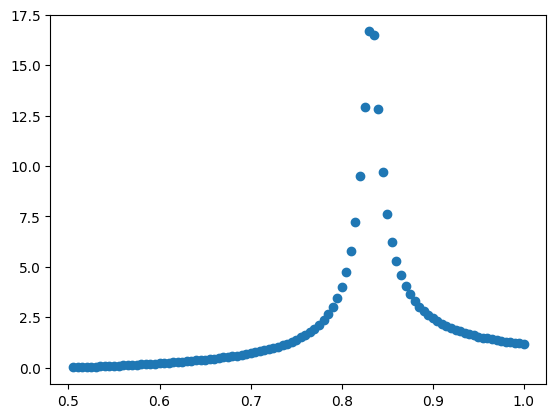

In [28]:
plt.scatter(np.unique(nat_freqs),amp)

In [43]:
peaks = find_peaks(amp.flatten())[0][0]
print(freqs[peaks])

[0.83]
